# Word Embedding

단어를 백터로 표현하는 방법. 단어를 밀집 표현으로 변환.

1. Sparse Representation: One-Hot Vector처럼 대부분의 값을 0으로 표현하는 방법.
- 단어 집합이 클수록 벡터의 크기가 엄청 커진다는 단점. 심지어 대부분이 비어있다.
- 단어의 의미를 표현하지 못함

2. Dense Representation: 단어 집합의 크기에 의존하지 않고 사용자가 지정해준 크기에 벡터의 크기를 맞춰서 표현하는 방법.
- Sparse Representation과 달리, 벡터가 다양한 실수값으로 채워짐. 또한 차원도 sparse representation 때보다도 더 줄일 수 있고, 그 결과 값들이 밀집되어 있다고 해서 이렇게 불림.

## Word Embedding

- 단어를 Dense Vector의 형태로 표현하는 방법. 이 벡터는 word embedding의 결과로 나온 벡터여서 embedded vector라고도 부름.
- 가중치를 학습하는 것과 비슷하게 embedded vector 내에 있는 값들은 초기에 랜덤하게 주어져 있고, 인공신경망의 학습을 통해 각 단어에게 가장 적합한 벡터를 찾아나간다.

## Word2Vec

각 단어 벡터 간 유의미한 유사도를 반영할 수 있도록 단어의 의미를 수치화하는 방법. 단어들 간에 산술연산이 가능한 것처럼 보이게 된다.

ex) "한국" - "서울" + "도쿄" = "일본"

위와 같은 연산이 된다는 것. 단어들 간의 유사성을 기반으로 연산을 하는 것처럼 보임.

## Distributed Representation

단어의 의미를 다차원 공간에 벡터화하는 방법을 사용해 표현하는 방법. 분산 표현을 이용하여 단어 간 의미적 유사성을 벡터화하는 작업을 word embedding이라 하고 이렇게 표현된 벡터를 embedded vector이라고 함.

- **비슷한 문맥에서 등장하는 단어들은 비슷한 의미를 가진다**는 가설을 토대로 만들어진 표현방법.
- 사용자가 제한한 저차원 내에서 단어의 의미를 여러 차원에 분산하여 표현해 놓으면 나중에 유의미한 유사도를 계산 가능. 이를 학습하는 대표적인 방법이 Word2Vec이다.

## CBOW (Continuous Bag of Words) and Skip-Gram

- CBOW: 주변에 있는 단어들을 입력으로 중간에 있어야 할 단어를 예측 이때, 중심 단어를 center word, 주변 단어를 context word라고 부른다.
- Skip-Gram: 중간에 있는 단어들을 입력으로 주변을 예측

### CBOW

중심 단어 예측 위해 주변 단어를 앞뒤로 몇개씩 볼지를 결정해야함. 이 범위를 **window**라고 함. 이 window를 첫 단어에 올려놓고 옆으로 한 단어씩 움직이면서 데이터셋을 만든다. 이를 **window sliding**이라고 부른다. Word2Vec의 입력은 One-Hot Vector로 표현되어야 하기에 모든 데이터들은 one-hot vector로 표현된다.
각 데이터셋은 center word를 기준으로 window의 크기만큼 앞뒤로 context word를 가진다. 예를 들어 window = 2이면 하나의 데이터는 4개의 context word와 하나의 center word가 묶여 있게 되는데, 이 중 center word가 학습할 때 사용하는 **label**이 된다.

Word2Vec은 입력과 출력이 모두 one-hot vector이고 중간에 Projection layer이라는 층이 하나있다. Activation function은 없다.

Word2Vec은 총 3개의 Layer이 있다. 

- Input Layer: One-hot vector로 인코딩돤 단어들을 받는다. 이 때 window의 크기에 따라 사용하는 단어의 수가 결정된다. 예를 들어 window 크기가 2이면, 앞뒤로 2개씩 총 4개의 단어를 입력값으로 사용한다.

- Projection Layer: One-hot Vector를 embedded vector로 바꾸는 층이다. Input layer와 projection layer 사이에 있는 행렬을 **lookup table**이라고 한다. Lookup table이 된 이유는 실제로 one-hot vector를 행렬과 곱하면, **실제로는 1이 써있는 위치를 index로 사용해서 행렬의 행을 찾는 것과 같다**. 예를 들어 [0, 0, 1, 0] 이면, 가중치 행렬의 3번째 행에 그 단어의 embedded vector를 찾을 수 있다.

- Output Layer: Softmax function을 activation function으로 사용하고 projection layer과 output layer 사이에도 가중치 행렬이 존재하는데, 이 행렬은 lookup table의 행렬과는 완전 별개의 것으로 학습된다. Softmax를 통해 center word에 해당하는 위치의 확률값이 가장 크게 나와야 예측에 성공하는 것이다. 

실제로 계산될 때는 input에 사용된 단어들의 embedded vector의 평균을 구해서 벡터를 하나 만들고, 이 평균벡터를 가중치 행렬과 곱한 뒤, 그 결과에 softmax를 추가해서 결과를 도출하게 된다.

Loss function으로는 cross entropy를 사용하고, backward propagation을 통해 두개의 가중치 행렬들이 업데이트된다.

### Skip-Gram

중심 단어로 주변 단어를 예측하는 방법이다. 단어를 window sliding하면서 묶어낼 때는, 중심 단어를 기준으로 주변 단어에 해당하는 단어들을 하나씩 짝을 지어서 데이터를 만든다. 

- Input Layer: 하나의 중심 단어의 one-hot vector를 받는다. 
- Projection Layer: embedded vector를 만드는 단계이다. CBOW와는 달리 이후에 벡터들 간의 평균을 구하는 작업이 없다. 
- Output Layer: 주변 단어들을 전부 예측값으로 내놓는 층이다. 각 단어들도 one-hot vector로 나온다.

성능은 Skip-Gram이 조금 더 좋다고 알려져 있다.

Word2Vec은 오로지 워드 임베딩을 목적으로 진행되는 것이기 목적이기에 중심 단어를 예측한다. 이는 중심 단어 주위에 있는 단어들도 전부 고려한다는 것으로 한쪽 방향으로만 단어들을 읽어들여서 다음 단어를 예측하는 피드 포워드 신경망 언어 모델(NNLM)보다 더 정확하다.

또한 연산의 측면에서 봤을 때 Word2Vec은 추후에 서술할 기법들을 토대로 속도도 개선했다.

## 영어 Word2Vec 만들기

In [ ]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7f454e6c4af0>)

### Preprocessing

XML 문서에는 tag 기호 <> </> 등이 있고, 이중 <content> </content> 사이에 있는 데이터를 뽑아내야 한다.

In [ ]:
import nltk

nltk.download('punkt')

targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


273424개의 문장들이 있다.

In [ ]:
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


In [ ]:
from gensim.models import  Word2Vec
from gensim.models import KeyedVectors

- vector_size = embedded vector의 차원
- window = context window 크기
- min_count = 단어의 최소 빈도수 제한 (너무 적게 나타나는 단어는 무시함)
- workers = 학습을 위한 process 수
- sg = 0 (CBOW), 1 (Skip-Gram)

In [ ]:
model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [ ]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8780651688575745), ('guy', 0.7990455627441406), ('lady', 0.7957423329353333), ('boy', 0.7694074511528015), ('girl', 0.7691280841827393), ('gentleman', 0.7648752927780151), ('soldier', 0.7345660924911499), ('kid', 0.7104830145835876), ('poet', 0.6726459860801697), ('photographer', 0.6543710827827454)]


"man"과 유사한 단어들이 나열되어 있다.

학습한 모델 저장 및 불러오기

In [ ]:
model.wv.save_word2vec_format('eng_w2v')
loaded_model = KeyedVectors.load_word2vec_format('eng_w2v')

In [ ]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.8780651688575745), ('guy', 0.7990455627441406), ('lady', 0.7957423329353333), ('boy', 0.7694074511528015), ('girl', 0.7691280841827393), ('gentleman', 0.7648752927780151), ('soldier', 0.7345660924911499), ('kid', 0.7104830145835876), ('poet', 0.6726459860801697), ('photographer', 0.6543710827827454)]


## 한국어 Word2Vec

In [ ]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 40.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models import Word2Vec
from konlpy.tag import Okt

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f45223a7dc0>)

In [ ]:
train_data = pd.read_table('ratings.txt')

In [ ]:
train_data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [ ]:
train_data.id.count()

200000

In [ ]:
train_data.isna().values.any()

True

In [ ]:
train_data = train_data.dropna(how = "any")  # delete all rows that have nan

In [ ]:
train_data.id.count()

199992

In [ ]:
train_data.document = train_data.document.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "")
train_data.head()

<ipython-input-34-37135b16b4a6>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data.document = train_data.document.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "")


,id,document,label
0,8112052,어릴때보고지금다시봐도재밌어요ㅋㅋ,1
1,8132799,디자인을배우는학생으로외국디자이너와그들이일군전통을통해발전해가는문화산업이부러웠는데사실우...,1
2,4655635,폴리스스토리시리즈는부터뉴까지버릴께하나도없음최고,1
3,9251303,와연기가진짜개쩔구나지루할거라고생각했는데몰입해서봤다그래이런게진짜영화지,1
4,10067386,안개자욱한밤하늘에떠있는초승달같은영화,1


In [ ]:
from tqdm import tqdm

stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data.document):
    tokenized_sentence = okt.morphs(sentence, stem=True)
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 199992/199992 [2:59:28<00:00, 18.57it/s]


리뷰의 최대 길이 : 68
리뷰의 평균 길이 : 10.669446777871116


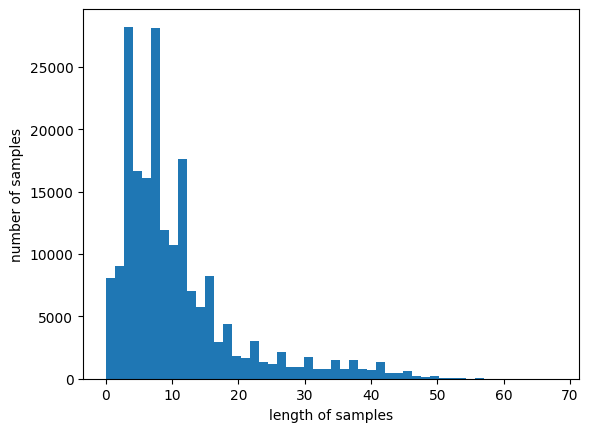

In [ ]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [ ]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(17947, 100)

In [ ]:
print(model.wv.most_similar("최민식"))

[('양동근', 0.86664217710495), ('안성기', 0.8583947420120239), ('이정재', 0.8543632626533508), ('신들리다', 0.8510591387748718), ('한석규', 0.8502815961837769), ('채민서', 0.8469075560569763), ('엄태웅', 0.8427112102508545), ('김명민', 0.8418781757354736), ('유오성', 0.8406359553337097), ('송강호', 0.8379599452018738)]


In [ ]:
print(model.wv.most_similar("히어로"))

[('느와르', 0.8420259356498718), ('호러', 0.8366925716400146), ('블록버스터', 0.8299514055252075), ('무비', 0.82478928565979), ('무협', 0.824350893497467), ('슬래셔', 0.8183257579803467), ('홍콩', 0.8139325380325317), ('로코', 0.804017186164856), ('물', 0.8002075552940369), ('멜로', 0.789430558681488)]


word embedded matrix 모델을 저장한다.

In [ ]:
model.wv.save_word2vec_format('kor_w2v')

In [ ]:
loaded_model = KeyedVectors.load_word2vec_format('kor_w2v')
model_result = loaded_model.most_similar("최민식")
print(model_result)

[('양동근', 0.86664217710495), ('안성기', 0.8583947420120239), ('이정재', 0.8543632626533508), ('신들리다', 0.8510591387748718), ('한석규', 0.8502815961837769), ('채민서', 0.8469075560569763), ('엄태웅', 0.8427112102508545), ('김명민', 0.8418781757354736), ('유오성', 0.8406359553337097), ('송강호', 0.8379599452018738)]


## Negative Sampling

Word2Vec은 단어 집합의 크기가 매우 크다면 학습하기 꽤 무거움. 단어 집합에 있는 모든 단어들에 대해 backward propagation을 통해 학습해야 하기 때문에 매우 오래걸림. 그런데 모든 단어들 중 중심 단어와 별 상관이 없어 보이는 단어들의 embedding 값까지 굳이 학습할 필요는 없을지도?

Negative Sampling은 이 점에 착안해서 일부 단어 집합에만 집중하는 방법이다. 하나의 중심 단어를 기준으로 주변 단어들로 이루어진 훨씬 작은 단어 집합을 만들고 주변 단어들을 Positive, 그외 랜덤한 단어들을 Negative로 레이블링하면 binary classification 문제가 된다. 이는 연산량의 측면에서 훨씬 효율적이다.

## Skip-Gram with Negative Sampling (SGNS)

Skip-Gram은 중심 단어로부터 주변 단어들을 예측한다. 하지만 Negative Sampling을 이용할 경우, 조금 다르게 한다. 입력 데이터로 중심 단어와 주변 단어를 전부 입력한다. 그리고 이 입력된 단어들이 실제로 window 내에 모여 있을 확률을 예측한다. 

학습에 필요한 데이터셋도, 기존의 Skip-Gram이 사용했던 중심값이 데이터이고 주변 데이터 하나가 레이블이 아닌, 중심값과 주변값 한 쌍 씩 입력으로 사용하고 레이블로는 이들이 window 내에 있었다면 1, 그 외는 0으로 해서 데이터셋을 만든다.
이 다음에는 window 내에 있지 않았던 단어들을 중심 단어들과 엮어서 추가로 레이블이 0인 데이터들을 만들어낸다.

그 후에는 embedding matrix(look up table)을 2개를 준비하는데, 하나는 중심단어들을 위한거고, 다른 하나는 주변 단어들을 위한 거다. 그 후, 중심 단어와 주변 단어 lookup table에서 embedding vector를 하나씩 뽑아서 내적해서 예측값을 계산한다. 그리고 오차를 통해 backward propagation을 해서 lookup table을 업데이트한다.

학습 후에 생긴 2개의 embedded matrix 중 중심 단어 lookup table만 embedded matrix로 사용할 수 있고, 아니면 둘을 concatenate해서 사용하는 것도 가능하다.

## Negative Sampling 으로 데이터셋 구성하기

1. 데이터 전처리


In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

documents 에 있는 내용들만 사용한다. 알파벳 이외의 모든 문자는 지우고 길이가 3 미만인 단어들은 없애고 전부 소문자로 만들어준다.

In [3]:
news_df = pd.DataFrame({'document':documents})
news_df['clean_doc'] = news_df.document.str.replace("[^a-zA-Z]", " ")
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

<ipython-input-3-d2143aac9296>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  news_df['clean_doc'] = news_df.document.str.replace("[^a-zA-Z]", " ")


결측치를 제거한다.

In [4]:
news_df.isna().values.any()

False

In [5]:
news_df.replace("", float("NaN"), inplace=True)
news_df.isnull().values.any()

True

In [6]:
news_df.dropna(inplace=True)
print('총 샘플 수 :',len(news_df))

총 샘플 수 : 10995


In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

불용어를 제거한다

In [8]:
# 불용어를 제거
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
tokenized_doc = tokenized_doc.to_list()

In [9]:
# 단어가 1개 이하인 샘플의 인덱스를 찾아서 저장하고, 해당 샘플들은 제거.
drop_train = [index for index, sentence in enumerate(tokenized_doc) if len(sentence) <= 1]
tokenized_doc = np.delete(tokenized_doc, drop_train, axis=0)
print('총 샘플 수 :',len(tokenized_doc))

총 샘플 수 : 10940


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:5030: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


다 정리한 단어들을 tokenize

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

word2idx = tokenizer.word_index
idx2word = {value : key for key, value in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_doc)

In [11]:
vocab_size = len(word2idx) + 1 
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 64277


2. Negative Sampling

Skip-Gram으로 negative sampling 진행

상위 10개의 뉴스 그룹만 사용한다.

In [12]:
from tensorflow.keras.preprocessing.sequence import skipgrams
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:10]]

In [14]:
# 첫번째 샘플인 skip_grams[0] 내 skipgrams로 형성된 데이터셋 확인
pairs, labels = skip_grams[0][0], skip_grams[0][1]  # window 내에 있었으면 1, 없었으면 0으로 label이 되어있다.
for i in range(5):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          idx2word[pairs[i][0]], pairs[i][0], 
          idx2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

(europeans (4520), rikkyo (29154)) -> 0
(reason (149), least (87)) -> 1
(rediculous (15227), cgeuge (47782)) -> 0
(story (603), statement (474)) -> 1
(reputation (5533), traction (7728)) -> 0


In [18]:
# 첫번째 뉴스그룹 샘플에 대해서 생긴 pairs와 labels의 개수
print(len(pairs))
print(len(labels))

2220
2220


## Skip-Gram with Negative Sampling

In [19]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input
from tensorflow.keras.layers import Dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

SGNS는 center word와 context word 두 개의 table을 학습해야 한다.

In [20]:
embedding_dim = 100

# embedding table for center words
w_inputs = Input(shape=(1,), dtype='int32')
word_embedding = Embedding(vocab_size, embedding_dim)(w_inputs)

# embedding table for context words
c_inputs = Input(shape=(1,), dtype='int32')
context_embedding = Embedding(vocab_size, embedding_dim)(c_inputs)

2개의 테이블에서 각 벡터들이 내적을 통해 예측값을 나타낸다. 마지막에는 sigmoid 함수를 써서 binary classification으로 바꿔준다.

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 100)       6427700     ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 100)       6427700     ['input_2[0][0]']                
                                                                                              

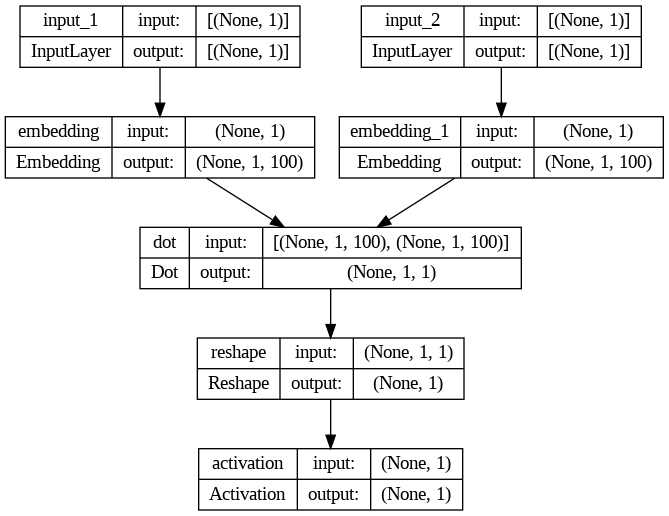

In [21]:
dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')
plot_model(model, to_file='model13.png', show_shapes=True, show_layer_names=True, rankdir='TB')

Skip gram으로 생성된 샘플들을 학습한다. 학습 데이터는 (중심, 주변) 쌍, 레이블은 그 두 데이터가 같은 window 안에 있는지에 대한 레이블이다.

In [22]:
for epoch in range(1, 10):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X, Y)
    print('Epoch :', epoch, 'Loss :', loss)

Epoch : 1 Loss : 6.93171900510788
Epoch : 2 Loss : 6.907423257827759
Epoch : 3 Loss : 6.882184267044067
Epoch : 4 Loss : 6.852226614952087
Epoch : 5 Loss : 6.815107643604279
Epoch : 6 Loss : 6.768670737743378
Epoch : 7 Loss : 6.711033582687378
Epoch : 8 Loss : 6.640593707561493
Epoch : 9 Loss : 6.556063294410706


## 결과 확인

In [23]:
import gensim

f = open('vectors.txt' ,'w')
f.write('{} {}\n'.format(vocab_size-1, embedding_dim))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

# 모델 로드
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

In [24]:
w2v.most_similar(positive=['soldiers'])

[('inhuman', 0.4198784828186035),
 ('kasatonov', 0.37291598320007324),
 ('sumarize', 0.37092098593711853),
 ('grav', 0.36673128604888916),
 ('holocaust', 0.3642317056655884),
 ('away', 0.36386817693710327),
 ('sees', 0.35642051696777344),
 ('friend', 0.3552589416503906),
 ('criss', 0.3551224172115326),
 ('triumph', 0.35479605197906494)]

In [25]:
w2v.most_similar(positive=['doctor'])

[('recognised', 0.39004194736480713),
 ('bbdf', 0.3683587610721588),
 ('borrows', 0.3616293668746948),
 ('rushmore', 0.36084944009780884),
 ('isrealis', 0.35619017481803894),
 ('presses', 0.3557768166065216),
 ('nelly', 0.35289713740348816),
 ('entrepreneurial', 0.3503597378730774),
 ('mccrae', 0.34952080249786377),
 ('xdswm', 0.34921795129776)]

In [26]:
w2v.most_similar(positive=['police'])

[('liquidation', 0.4572572112083435),
 ('questor', 0.4227037727832794),
 ('roll', 0.421782910823822),
 ('encounter', 0.38841694593429565),
 ('guards', 0.38825374841690063),
 ('enthusiam', 0.37643590569496155),
 ('stereotypical', 0.36194926500320435),
 ('hyperbole', 0.3598844110965729),
 ('aquainted', 0.35551127791404724),
 ('twerdokhlebof', 0.3519887924194336)]

In [27]:
w2v.most_similar(positive=['knife'])

[('hagen', 0.4200635850429535),
 ('pressed', 0.39707934856414795),
 ('hypothesizing', 0.3965153694152832),
 ('vjccb', 0.3948829472064972),
 ('jsuttor', 0.37876462936401367),
 ('kauy', 0.37408462166786194),
 ('suddnely', 0.36966627836227417),
 ('handel', 0.36469221115112305),
 ('adrenalizing', 0.3592391312122345),
 ('hebrew', 0.35673394799232483)]

In [28]:
w2v.most_similar(positive=['engine'])

[('secretary', 0.41915497183799744),
 ('strongly', 0.4135987162590027),
 ('offertory', 0.3972224295139313),
 ('wannabes', 0.3967452049255371),
 ('khflai', 0.3873201906681061),
 ('microbrewery', 0.37486085295677185),
 ('lewczyk', 0.3739442825317383),
 ('techie', 0.3715573847293854),
 ('albums', 0.3627556264400482),
 ('sshd', 0.35936757922172546)]

아쉽지만 아주 좋은 결과가 나오진 않은 것 같다.

## GloVe(Global Vectors for Word Representation)

Word2Vec은 window 크기 내에서만 학습에 반영되기 때문에 전체 corpus에 대해서는 제대로 반영이 되지 않는다는 지적이 있었다.

GloVe는 카운트의 방법과 예측의 방법을 둘 다 사용하는 모델이고, 성능도 Word2Vec에 준한다.

## Window-Based Co-occurrence Matrix

하나의 행렬을 만드는데, 각 원소 (i, j)의 의미는 window 크기를 n이라고 했을 때 i번째 단어를 기준으로 앞뒤로 window n개 범위 내어세 j번째 단어가 몇번 나타나는지를 적어놓은 것이다. 이 행렬은 전치를 해도 동일한 대칭행렬이 된다.

## Co-occurrence Probability

동시 등장 확률 P(k | i)는 i번째 단어가 총 등장한 횟수를 카운트하고, i번째 단어가 출현했을 때 k번째 단어가 출현했을 확률을 나타낸다. (조건부 확률). 동시 등장 행렬을 바탕으로 만들어 낸다. 각 i번째 행의 값을 전부 더해서 나타난 횟수를 전부 더하고 분자로는 i 행, k 열의 수를 사용해서 나타내면 조건부 확률로 표현할 수 있다.

## GloVe의 목표

임베딩 된 중심 단어와 주변 단어의 내적이 전체 코퍼스에서 동시 등장할 확률이 돠도록 만드는 것. 즉, 주어진 코퍼스 내에서 중심 단어와 주변 단어가 window 범위 안에 서로 나타날 확률이 그 두 임베딩 벡터의 내적값이 되도록 하는 것이다.

## Loss function

단어들 간의 관계를 잘 설명하기 위해 다음과 같은 표현을 살핀다.
$\frac{P_{ik}}{P_{jk}}$. 이 표현은 i번째 단어가 나타났을 때 k가 주변 단어일 확률을 j번째 단어가 나타났을 때 k번째 단어가 주변 단어일 확률을 나눈 것이다. 이 값을 통해서 알 수 있는 것은 i가 k와 훨씬 유사한 관계일 경우, 이 값이 굉장히 크게 나올 것이고, 만약 j와 k의 관계가 더 유사하다면 이 값은 매우 작은 값으로 나올 것이다.

최종 loss function 은 다음과 같다:

$$Loss function = \sum^V_{mn=1}f(X_{mn})(w^T_m \tilde{w_n}+b_m+\tilde{b_n}-\log X_{mn})^2$$

Glove 실습을 하려고 했으나, Glove 패키지 자체의 문제로 하지 못했다.

## FastText

페이스북에서 만든 단어를 벡터로 만드는 또 하나의 방법이다. FastText는 하나의 단어 안에도 subword를 고려하여 학습한다.

### Subword 학습

각 단어는 글자 단위 n-gram의 구성으로 취급한다. 

예를 들어 apple이라는 단어에 n = 3인 subword는 <ap, app, ppl, ple, le>, <apple> 이렇게 6개의 subword token을 만든다.

실제 사용할 때는 n의 값을 범위로 설정한다. 이렇게 하면 아주 많은 subword들이 나오게 되고, 이들을 전부 합해서 apple이라는 벡터를 표현한다.

### OOV 대응

Subword 학습을 통해 내부에 있는 단어들이 학습이 되어 있는 경우라면 OOV에 대해서도 유사도를 계산해낼 수 있다.

### Rare Words

희귀한 단어들도 다른 보편적인 단어들의 n-gram과 비슷하다면 유사도를 계산할 수 있다. 원래는 데이터가 너무 적어서 임베딩이 잘 되지 않는 문제가 있었는데, 이를 보완할 수 있다. 특히 오타가 발생한 corpus의 경우에도 일정 부분 학습을 할 수 있다.

## FastText 실습

위에서 Word2Vec 을 만들었던 걸로 비교한다.

In [ ]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7fb528d9e620>)

In [ ]:
import nltk

nltk.download('punkt')

targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [ ]:
model.wv.most_similar("electrofishing")

KeyError: ignored

모르는 단어는 아예 처리가 안된다.

In [ ]:
from gensim.models import FastText

model = FastText(result, vector_size=100, window=5, min_count=5, workers=4, sg=1)

In [ ]:
model.wv.most_similar('electrofishing')

[('electrolux', 0.8722091913223267),
 ('electrolyte', 0.8671135306358337),
 ('electroshock', 0.85752934217453),
 ('electro', 0.8515357375144958),
 ('electroencephalogram', 0.8409291505813599),
 ('electrochemical', 0.8255844116210938),
 ('airbus', 0.8249354958534241),
 ('electrogram', 0.8213939070701599),
 ('electric', 0.8213211894035339),
 ('airbag', 0.8197550773620605)]

## 한국어 FastText

한글에서는 subword로 자모 단위로 쪼개는 시도가 있다.

## Pre-trained Word Embedding

미리 훈련된 데이터를 임베딩 층으로 사용하는 방법도 있다. 훈련 데이터가 적은 상황에서 이미 학습된 걸 활용해서 성능을 개선하는 방법이다.

### Keras Embedding Layer 구현

Preprocessing: tokenize, integer encoding and padding

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent work', 'supreme quality', 'bad', 'highly respectable']
y_train = [1, 0, 0, 1, 1, 0, 1]  # 긍정적인 문장 1, 부정적인 문장 2

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
vocab_size = len(tokenizer.word_index) + 1 # padding +1

In [ ]:
X_encoded = tokenizer.texts_to_sequences(sentences)

In [ ]:
max_len = max(len(l) for l in X_encoded)
print('최대 길이 :',max_len)

최대 길이 : 4


In [ ]:
X_train = pad_sequences(X_encoded, maxlen=max_len, padding='post')
y_train = np.array(y_train)

모델 만들기, 개념 때는 one-hot vector를 input으로 넣는다고 배웠으나, Keras에서는 integer encodingg과 padding이 끝나면 바로 embedding layer에 넣으면 된다.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

embedding_dim = 4

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 4s - loss: 0.6900 - acc: 0.4286 - 4s/epoch - 4s/step
Epoch 2/100
1/1 - 0s - loss: 0.6888 - acc: 0.4286 - 8ms/epoch - 8ms/step
Epoch 3/100
1/1 - 0s - loss: 0.6877 - acc: 0.5714 - 16ms/epoch - 16ms/step
Epoch 4/100
1/1 - 0s - loss: 0.6865 - acc: 0.5714 - 9ms/epoch - 9ms/step
Epoch 5/100
1/1 - 0s - loss: 0.6853 - acc: 0.5714 - 8ms/epoch - 8ms/step
Epoch 6/100
1/1 - 0s - loss: 0.6842 - acc: 0.5714 - 9ms/epoch - 9ms/step
Epoch 7/100
1/1 - 0s - loss: 0.6830 - acc: 0.7143 - 8ms/epoch - 8ms/step
Epoch 8/100
1/1 - 0s - loss: 0.6818 - acc: 0.7143 - 10ms/epoch - 10ms/step
Epoch 9/100
1/1 - 0s - loss: 0.6807 - acc: 0.7143 - 8ms/epoch - 8ms/step
Epoch 10/100
1/1 - 0s - loss: 0.6795 - acc: 0.7143 - 8ms/epoch - 8ms/step
Epoch 11/100
1/1 - 0s - loss: 0.6783 - acc: 0.8571 - 12ms/epoch - 12ms/step
Epoch 12/100
1/1 - 0s - loss: 0.6771 - acc: 0.8571 - 8ms/epoch - 8ms/step
Epoch 13/100
1/1 - 0s - loss: 0.6759 - acc: 0.8571 - 8ms/epoch - 8ms/step
Epoch 14/100
1/1 - 0s - loss: 0.6747 - acc:

## 사전 훈련된 GloVe 사용

위에서는 Keras로 처음부터 다 만들었지만, 이번에는 있는걸 활용해본다.

In [ ]:
from urllib.request import urlretrieve, urlopen
import gzip
import zipfile

urlretrieve("http://nlp.stanford.edu/data/glove.6B.zip", filename="glove.6B.zip")
zf = zipfile.ZipFile('glove.6B.zip')
zf.extractall()
zf.close()

In [ ]:
embedding_dict = dict()

f = open('glove.6B.100d.txt', encoding='utf-8')

for line in f:
    word_vector = line.split()
    word = word_vector[0]

    word_vector_arr = np.asarray(word_vector[1:], dtype='float32')
    embedding_dict[word] = word_vector_arr
f.close()

print('%s개의 Embedding vector가 있습니다.' % len(embedding_dict))

400000개의 Embedding vector가 있습니다.


In [ ]:
print(embedding_dict['respectable'])
print('벡터의 차원 수 :',len(embedding_dict['respectable']))

[-0.049773   0.19903    0.10585    0.1391    -0.32395    0.44053
  0.3947    -0.22805   -0.25793    0.49768    0.15384   -0.08831
  0.0782    -0.8299    -0.037788   0.16772   -0.45197   -0.17085
  0.74756    0.98256    0.81872    0.28507    0.16178   -0.48626
 -0.006265  -0.92469   -0.30625   -0.067318  -0.046762  -0.76291
 -0.0025264 -0.018795   0.12882   -0.52457    0.3586     0.43119
 -0.89477   -0.057421  -0.53724    0.25587    0.55195    0.44698
 -0.24252    0.29946    0.25776   -0.8717     0.68426   -0.05688
 -0.1848    -0.59352   -0.11227   -0.57692   -0.013593   0.18488
 -0.32507   -0.90171    0.17672    0.075601   0.54896   -0.21488
 -0.54018   -0.45882   -0.79536    0.26331    0.18879   -0.16363
  0.3975     0.1099     0.1164    -0.083499   0.50159    0.35802
  0.25677    0.088546   0.42108    0.28674   -0.71285   -0.82915
  0.15297   -0.82712    0.022112   1.067     -0.31776    0.1211
 -0.069755  -0.61327    0.27308   -0.42638   -0.085084  -0.17694
 -0.0090944  0.1109     0.

내가 풀고자 하는 문제의 단어 집합 크기의 행과 100개의 열(사전 학습 모델의 embedding vector 크기)을 가지는 행렬을 생성한다.

In [ ]:
embedding_matrix = np.zeros((vocab_size, 100))
print('임베딩 행렬의 크기(shape) :',np.shape(embedding_matrix))

임베딩 행렬의 크기(shape) : (16, 100)


In [ ]:
print(tokenizer.word_index.items())

dict_items([('nice', 1), ('great', 2), ('best', 3), ('amazing', 4), ('stop', 5), ('lies', 6), ('pitiful', 7), ('nerd', 8), ('excellent', 9), ('work', 10), ('supreme', 11), ('quality', 12), ('bad', 13), ('highly', 14), ('respectable', 15)])


In [ ]:
tokenizer.word_index["great"]

2

사전 학습된 모델의 "great"단어의 embedding vector

In [ ]:
embedding_dict["great"]

array([-0.013786 ,  0.38216  ,  0.53236  ,  0.15261  , -0.29694  ,
       -0.20558  , -0.41846  , -0.58437  , -0.77355  , -0.87866  ,
       -0.37858  , -0.18516  , -0.128    , -0.20584  , -0.22925  ,
       -0.42599  ,  0.3725   ,  0.26077  , -1.0702   ,  0.62916  ,
       -0.091469 ,  0.70348  , -0.4973   , -0.77691  ,  0.66045  ,
        0.09465  , -0.44893  ,  0.018917 ,  0.33146  , -0.35022  ,
       -0.35789  ,  0.030313 ,  0.22253  , -0.23236  , -0.19719  ,
       -0.0053125, -0.25848  ,  0.58081  , -0.10705  , -0.17845  ,
       -0.16206  ,  0.087086 ,  0.63029  , -0.76649  ,  0.51619  ,
        0.14073  ,  1.019    , -0.43136  ,  0.46138  , -0.43585  ,
       -0.47568  ,  0.19226  ,  0.36065  ,  0.78987  ,  0.088945 ,
       -2.7814   , -0.15366  ,  0.01015  ,  1.1798   ,  0.15168  ,
       -0.050112 ,  1.2626   , -0.77527  ,  0.36031  ,  0.95761  ,
       -0.11385  ,  0.28035  , -0.02591  ,  0.31246  , -0.15424  ,
        0.3778   , -0.13599  ,  0.2946   , -0.31579  ,  0.4294

아까 만든 16 개의 단어들에 대한 embedding vector의 값들을 사전 학습된 lookup table에서 찾아서 채워 넣는다

In [ ]:
for word, index in tokenizer.word_index.items():
    vector_value = embedding_dict.get(word)
    if vector_value is not None:
        embedding_matrix[index] = vector_value

In [ ]:
embedding_matrix[2]

array([-0.013786  ,  0.38216001,  0.53236002,  0.15261   , -0.29694   ,
       -0.20558   , -0.41846001, -0.58437002, -0.77354997, -0.87866002,
       -0.37858   , -0.18516   , -0.12800001, -0.20584001, -0.22925   ,
       -0.42598999,  0.3725    ,  0.26076999, -1.07019997,  0.62915999,
       -0.091469  ,  0.70348001, -0.4973    , -0.77691001,  0.66044998,
        0.09465   , -0.44893   ,  0.018917  ,  0.33146   , -0.35021999,
       -0.35789001,  0.030313  ,  0.22253001, -0.23236001, -0.19719   ,
       -0.0053125 , -0.25848001,  0.58081001, -0.10705   , -0.17845   ,
       -0.16205999,  0.087086  ,  0.63028997, -0.76648998,  0.51618999,
        0.14072999,  1.01900005, -0.43136001,  0.46138   , -0.43584999,
       -0.47567999,  0.19226   ,  0.36065   ,  0.78987002,  0.088945  ,
       -2.78139997, -0.15366   ,  0.01015   ,  1.17980003,  0.15167999,
       -0.050112  ,  1.26259995, -0.77526999,  0.36030999,  0.95761001,
       -0.11385   ,  0.28035   , -0.02591   ,  0.31246001, -0.15

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

output_dim = 100

model = Sequential()
# weight 초기값을 사전 학습된 lookup table을 사용하고 해당 사전 학습 모델은 가만히 놔둔다는 의미에서 trainable=False
e = Embedding(vocab_size, output_dim, weights=[embedding_matrix], input_length=max_len, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 1s - loss: 0.6832 - acc: 0.4286 - 646ms/epoch - 646ms/step
Epoch 2/100
1/1 - 0s - loss: 0.6658 - acc: 0.4286 - 8ms/epoch - 8ms/step
Epoch 3/100
1/1 - 0s - loss: 0.6489 - acc: 0.4286 - 8ms/epoch - 8ms/step
Epoch 4/100
1/1 - 0s - loss: 0.6326 - acc: 0.4286 - 9ms/epoch - 9ms/step
Epoch 5/100
1/1 - 0s - loss: 0.6167 - acc: 0.7143 - 8ms/epoch - 8ms/step
Epoch 6/100
1/1 - 0s - loss: 0.6012 - acc: 0.7143 - 7ms/epoch - 7ms/step
Epoch 7/100
1/1 - 0s - loss: 0.5863 - acc: 0.7143 - 7ms/epoch - 7ms/step
Epoch 8/100
1/1 - 0s - loss: 0.5718 - acc: 0.7143 - 8ms/epoch - 8ms/step
Epoch 9/100
1/1 - 0s - loss: 0.5577 - acc: 0.7143 - 9ms/epoch - 9ms/step
Epoch 10/100
1/1 - 0s - loss: 0.5440 - acc: 0.7143 - 7ms/epoch - 7ms/step
Epoch 11/100
1/1 - 0s - loss: 0.5307 - acc: 0.7143 - 8ms/epoch - 8ms/step
Epoch 12/100
1/1 - 0s - loss: 0.5178 - acc: 0.8571 - 7ms/epoch - 7ms/step
Epoch 13/100
1/1 - 0s - loss: 0.5053 - acc: 1.0000 - 7ms/epoch - 7ms/step
Epoch 14/100
1/1 - 0s - loss: 0.4932 - acc:

## ELMo (Embeddings from Language Model)

위에서 소개한 모델들은 같은 단어면 항상 같은 임베딩 벡터를 지닌다. 하지만 동음이의어를 처러할 수 없다. 그렇기에 문맥에 따라 같은 단어도 다르게 임베딩이 된다면 어쩔지에 대해서 착안한 방법이다.

ELMo는 순방향 언어모델과 역방향 언어 모델을 둘 다 학습한다. 이 때 이 두 모델은 별개의 모델이다.그리고 입력으로 들어가는 벡터는 위에서 서술한 방식으로 만든 embedded vector가 아닌 합성곱을 이용해 embedding한 벡터이다. 

기본적으로 해당 모델은 2개 이상의 hidden layer가 있어야 한다. 

## 워드 임베딩의 평균

문장 내의 단어들의 임베딩 벡터들의 평균이 그 문장의 벡터가 될 수 있는 예시이다.

In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
vocab_size = 20000

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)
print('훈련용 리뷰 개수 :',len(X_train))
print('테스트용 리뷰 개수 :',len(X_test))

17464789/17464789 [==============================] - 2s 0us/step
훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000


정수 인코딩까지 완료가 된 데이터이다

In [ ]:
print('훈련 데이터의 첫번째 샘플 :',X_train[0])
print('훈련 데이터의 첫번째 샘플의 레이블 :',y_train[0])

훈련 데이터의 첫번째 샘플 : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
훈련 데이터의 첫번째 샘플의 레이블 : 1


In [ ]:
print('훈련용 리뷰의 평규 길이: {}'.format(np.mean(list(map(len, X_train)), dtype=int)))
print('테스트용 리뷰의 평균 길이: {}'.format(np.mean(list(map(len, X_test)), dtype=int)))

훈련용 리뷰의 평규 길이: 238
테스트용 리뷰의 평균 길이: 230


In [ ]:
max_len = 400

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)
print('X_train의 크기(shape) :', X_train.shape)
print('X_test의 크기(shape) :', X_test.shape)

X_train의 크기(shape) : (25000, 400)
X_test의 크기(shape) : (25000, 400)


Model Design

GlobalAveragePooling1D는 입력으로 들어오는 모든 벡터들의 평균을 구하는 역할

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
embedding_dim = 64

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))

model.add(GlobalAveragePooling1D())
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('embedding_average_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X_train, y_train, batch_size=32, epochs=10, callbacks=[es, mc], validation_split=0.2)

Epoch 1/10
622/625 [============================>.] - ETA: 0s - loss: 0.6305 - acc: 0.7110
Epoch 1: val_acc improved from -inf to 0.80680, saving model to embedding_average_model.h5
625/625 [==============================] - 82s 130ms/step - loss: 0.6301 - acc: 0.7114 - val_loss: 0.5250 - val_acc: 0.8068
Epoch 2/10
611/625 [============================>.] - ETA: 0s - loss: 0.4334 - acc: 0.8524
Epoch 2: val_acc improved from 0.80680 to 0.86760, saving model to embedding_average_model.h5
625/625 [==============================] - 33s 52ms/step - loss: 0.4320 - acc: 0.8530 - val_loss: 0.3796 - val_acc: 0.8676
Epoch 3/10
621/625 [============================>.] - ETA: 0s - loss: 0.3192 - acc: 0.8922
Epoch 3: val_acc improved from 0.86760 to 0.88000, saving model to embedding_average_model.h5
625/625 [==============================] - 15s 25ms/step - loss: 0.3191 - acc: 0.8922 - val_loss: 0.3235 - val_acc: 0.8800
Epoch 4/10
624/625 [============================>.] - ETA: 0s - loss: 0.2619 -

In [ ]:
loaded_model = load_model("embedding_average_model.h5")
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 2s 2ms/step - loss: 0.2867 - acc: 0.8886

 테스트 정확도: 0.8886


단어 벡터들의 평균만 구해도 충분히 문장을 대표할 수 있다는 대표적인 사례이다.

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1XS0UlE8gNNTRjnL6e64sMacOhtVERIqL' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1XS0UlE8gNNTRjnL6e64sMacOhtVERIqL" -O dart.csv && rm -rf /tmp/cookies.txt

--2023-05-03 11:14:18--  https://docs.google.com/uc?export=download&confirm=t&id=1XS0UlE8gNNTRjnL6e64sMacOhtVERIqL
Resolving docs.google.com (docs.google.com)... 142.251.163.113, 142.251.163.102, 142.251.163.100, ...
Connecting to docs.google.com (docs.google.com)|142.251.163.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hvm7m2nndmn3u17q8kcogkcaniuif2bc/1683112425000/17609157229046208934/*/1XS0UlE8gNNTRjnL6e64sMacOhtVERIqL?e=download&uuid=de75afe3-22f4-4f45-ac3e-e3bb66272583 [following]
--2023-05-03 11:14:18--  https://doc-04-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hvm7m2nndmn3u17q8kcogkcaniuif2bc/1683112425000/17609157229046208934/*/1XS0UlE8gNNTRjnL6e64sMacOhtVERIqL?e=download&uuid=de75afe3-22f4-4f45-ac3e-e3bb66272583
Resolving doc-04-7k-docs.googleusercontent.com (doc-04-7k-docs.googleusercontent.com)... 142.251.111.

In [ ]:
!wget https://dumps.wikimedia.org/kowiki/latest/kowiki-latest-pages-articles.xml.bz2

--2023-05-03 13:04:24--  https://dumps.wikimedia.org/kowiki/latest/kowiki-latest-pages-articles.xml.bz2
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.142, 2620:0:861:2:208:80:154:142
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 900873558 (859M) [application/octet-stream]
Saving to: ‘kowiki-latest-pages-articles.xml.bz2’

kowiki-latest-pages 100%[===================>] 859.14M  3.92MB/s    in 3m 45s  

2023-05-03 13:08:09 (3.82 MB/s) - ‘kowiki-latest-pages-articles.xml.bz2’ saved [900873558/900873558]



In [ ]:
!python -m wikiextractor.WikiExtractor kowiki-latest-pages-articles.xml.bz2

/usr/bin/python3: Error while finding module specification for 'wikiextractor.WikiExtractor' (ModuleNotFoundError: No module named 'wikiextractor')
